In [259]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [260]:
df = pd.read_csv('data/reports.csv')
df.head()

,Genre,Reports,Age,Gpa,Year,Count,Gender
0,Academic Support and Resources,The limited access to research databases and m...,27,2.18,2,1,M
1,Academic Support and Resources,I'm having trouble finding the course material...,23,3.11,2,1,F
2,Academic Support and Resources,It's frustrating to have limited access to res...,20,3.68,2,1,F
3,Academic Support and Resources,I'm really struggling in one of my classes but...,20,1.30,2,1,F
4,Academic Support and Resources,I am really struggling with understanding the...,26,2.50,2,1,F


In [261]:
df.shape

(1005, 7)

In [262]:
df.dtypes

Genre       object
Reports     object
Age          int64
Gpa        float64
Year         int64
Count        int64
Gender      object
dtype: object

# Data Preprocessing

In [263]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005 entries, 0 to 1004
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Genre    1005 non-null   object 
 1   Reports  1005 non-null   object 
 2   Age      1005 non-null   int64  
 3   Gpa      1005 non-null   float64
 4   Year     1005 non-null   int64  
 5   Count    1005 non-null   int64  
 6   Gender   1005 non-null   object 
dtypes: float64(1), int64(3), object(3)
memory usage: 55.1+ KB


In [264]:
df.isnull().sum()

Genre      0
Reports    0
Age        0
Gpa        0
Year       0
Count      0
Gender     0
dtype: int64

In [265]:
# Descriptive Statistics
df.describe()

,Age,Gpa,Year,Count
count,1005.000000,1005.000000,1005.000000,1005.0
mean,21.298507,2.088856,2.684577,1.0
std,3.338841,1.208738,1.461665,0.0
min,16.000000,0.010000,1.000000,1.0
25%,18.000000,1.080000,1.000000,1.0
50%,21.000000,2.110000,2.000000,1.0
75%,24.000000,3.090000,4.000000,1.0
max,27.000000,4.970000,5.000000,1.0


In [266]:
df.columns.tolist()

['Genre', 'Reports', 'Age', 'Gpa', 'Year', 'Count', 'Gender']

In [267]:
df['Genre'].unique()

array(['Academic Support and Resources', 'Athletics and sports',
       'Career opportunities', 'Financial Support',
       'Health and Well-being Support',
       'International student experiences', 'Online learning',
       'Student Affairs', 'Housing and Transportation',
       'Activities and Travelling', 'Food and Cantines'], dtype=object)

In [268]:
# Top 10 Complaints
top_complaints = pd.DataFrame({'Complaint': df['Reports'].value_counts().head(10).index, 'Count': df['Reports'].value_counts().head(10).values})
top_complaints

,Complaint,Count
0,The limited access to research databases and m...,2
1,The academic workload is causing significant s...,2
2,There seems to be a scarcity of available inte...,2
3,I'm not sure I'll be able to afford to finish...,2
4,"26. ""Sometimes, I feel like I'm not able to fu...",1
5,The lack of face-to-face interaction in online...,1
6,Online students often feel like they are miss...,1
7,Technical difficulties with online classes ha...,1
8,Limited access to online resources has made i...,1
9,Time zone differences for online classes have...,1


In [269]:
# Most Prevalent Genre
top_genre = pd.DataFrame({'Genre': df['Genre'].value_counts().head(1).index, 'Count': df['Genre'].value_counts().head(1).values})
top_genre

,Genre,Count
0,Academic Support and Resources,236


In [270]:
df['Genre'].value_counts()

Academic Support and Resources       236
Food and Cantines                    138
Financial Support                     91
Online learning                       90
Career opportunities                  89
International student experiences     86
Athletics and sports                  85
Housing and Transportation            64
Health and Well-being Support         53
Activities and Travelling             40
Student Affairs                       33
Name: Genre, dtype: int64

In [271]:
 df.groupby('Gender')['Count'].sum()

Gender
F    549
M    456
Name: Count, dtype: int64

In [272]:
df['Age'].value_counts().sort_index()

16     86
17     61
18    109
19     98
20     80
21    101
22     92
23     90
24     64
25     76
26     79
27     69
Name: Age, dtype: int64

In [273]:
df[['Gender', 'Age', 'Gpa']][df['Age'] == 16].sort_values(by=['Age', 'Gpa'])

,Gender,Age,Gpa
701,F,16,0.04
253,M,16,0.06
330,F,16,0.09
684,F,16,0.12
463,M,16,0.15
...,...,...,...
300,M,16,3.90
800,F,16,3.92
674,M,16,3.95
18,M,16,3.97


In [274]:
df['Year'].value_counts()

1    297
2    226
4    175
5    164
3    143
Name: Year, dtype: int64

# Data Visualization

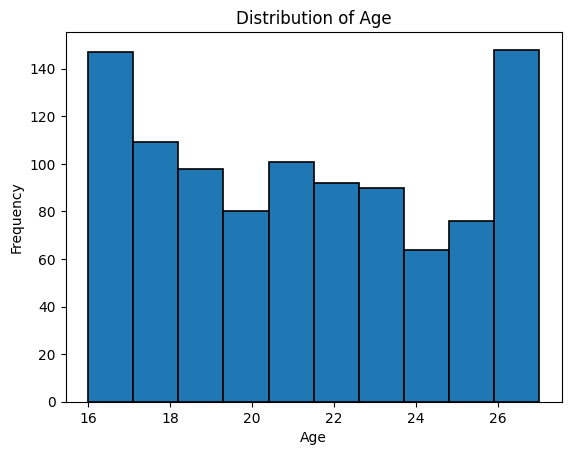

In [275]:
# Plot a histogram of a numerical variable
plt.hist(df['Age'], edgecolor='black', linewidth=1.2)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

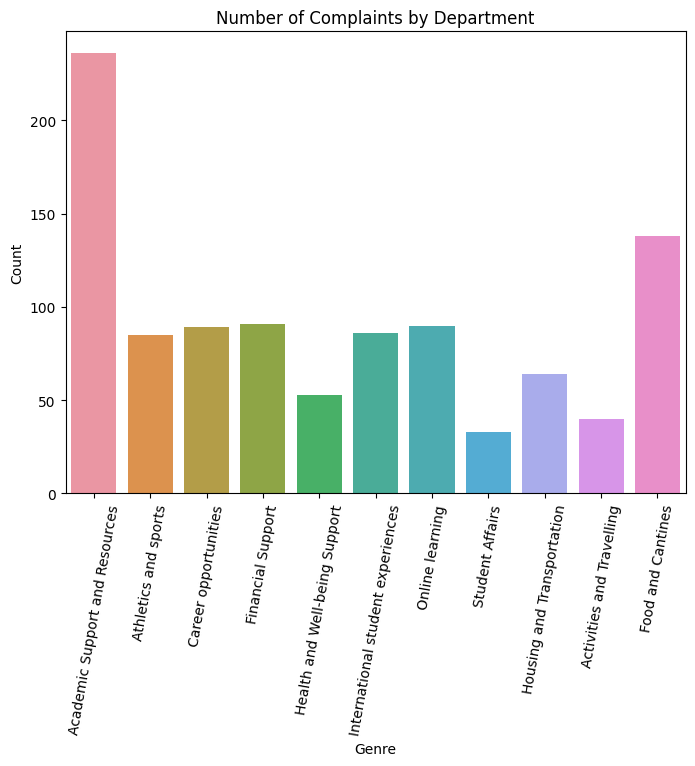

In [276]:
# Create a bar chart of categorical variable
plt.figure(figsize=(8, 6))
sns.countplot(x='Genre', data=df)
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Number of Complaints by Department')
plt.xticks(rotation=80)
plt.show()

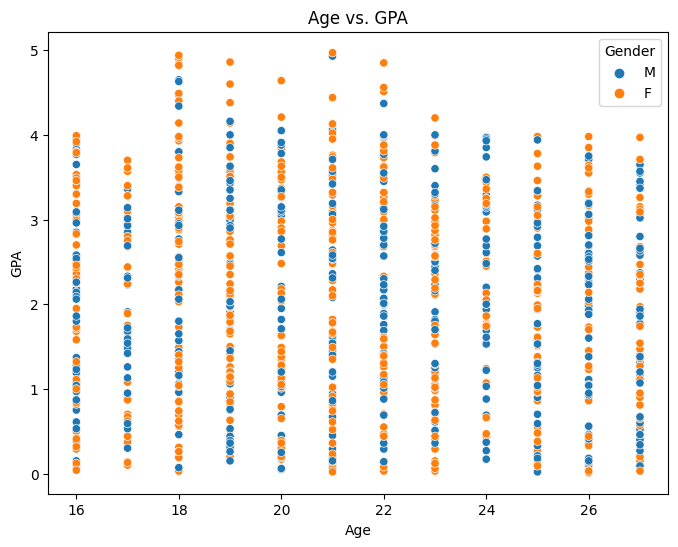

In [277]:
# Create a scatter plot of Age vs. GPA
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Age', y='Gpa', hue='Gender')
plt.xlabel('Age')
plt.ylabel('GPA')
plt.title('Age vs. GPA')
plt.show()

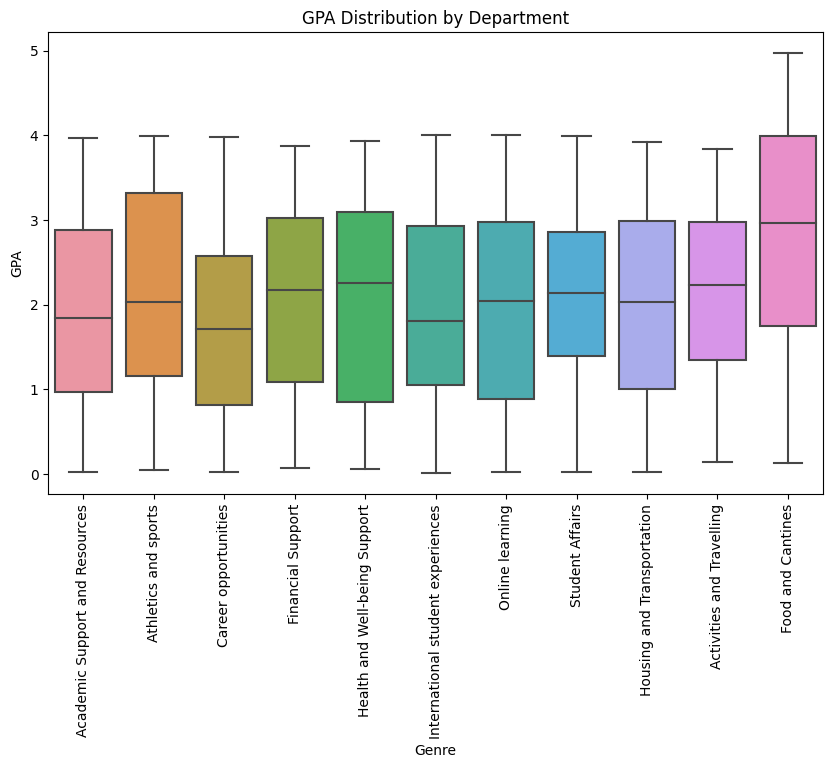

In [278]:
# Create a box plot of GPA by Department
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Genre', y='Gpa')
plt.xlabel('Genre')
plt.ylabel('GPA')
plt.title('GPA Distribution by Department')
plt.xticks(rotation=90)
plt.show()

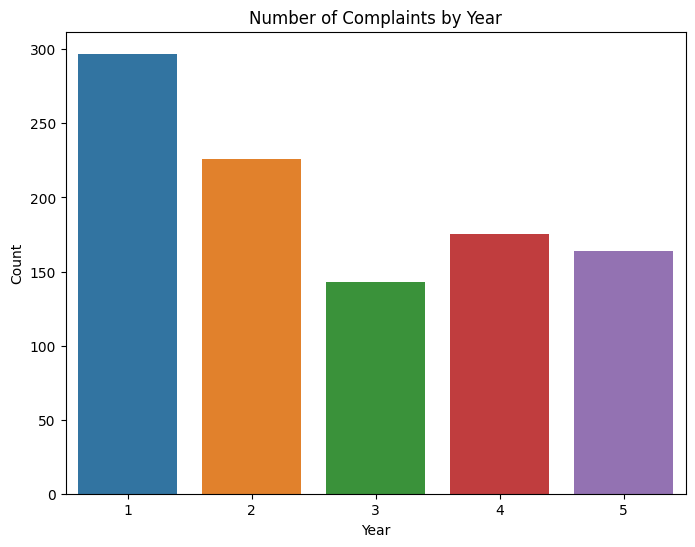

In [279]:
# Create a countplot of the Year column
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Number of Complaints by Year')
plt.show()

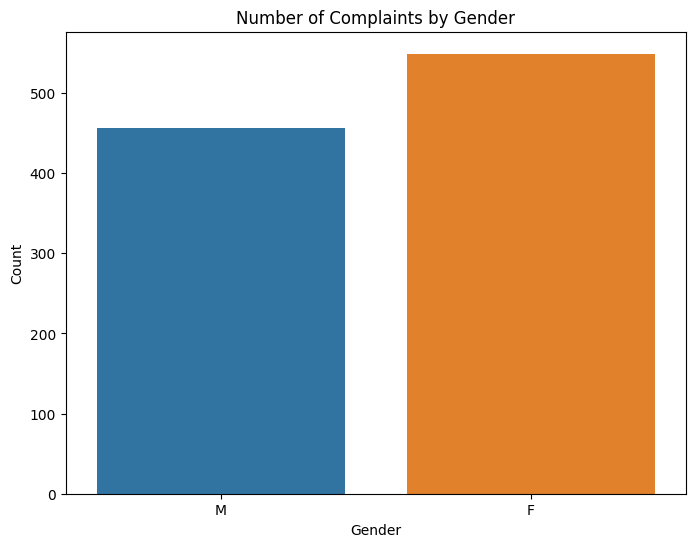

In [280]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Number of Complaints by Gender')
plt.show()

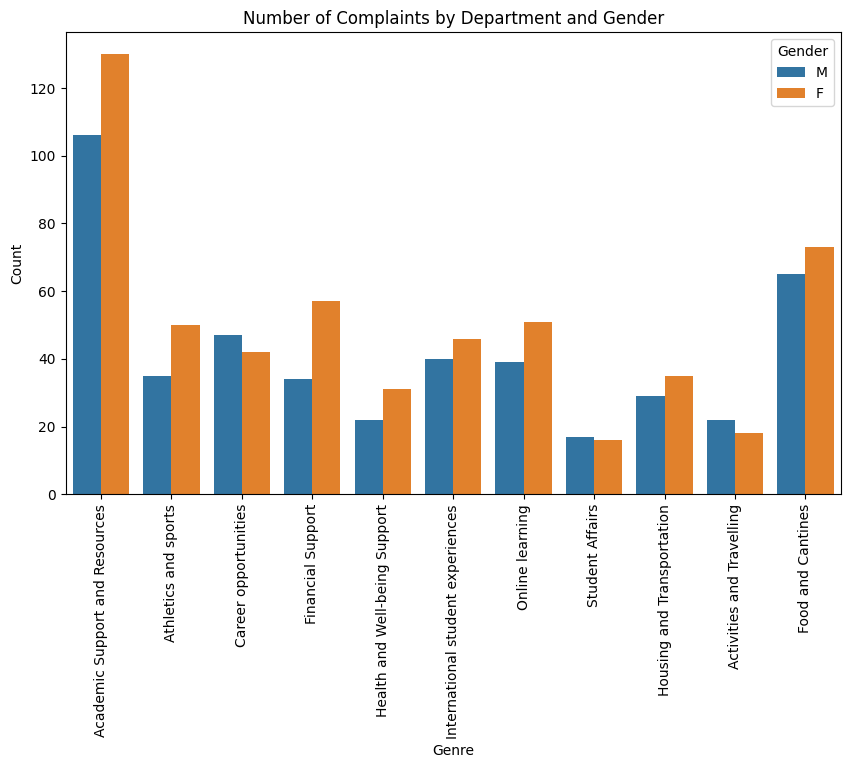

In [281]:
# Stacked Bar chart
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Genre', hue='Gender')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Number of Complaints by Department and Gender')
plt.xticks(rotation=90)
plt.legend(title='Gender')
plt.show()

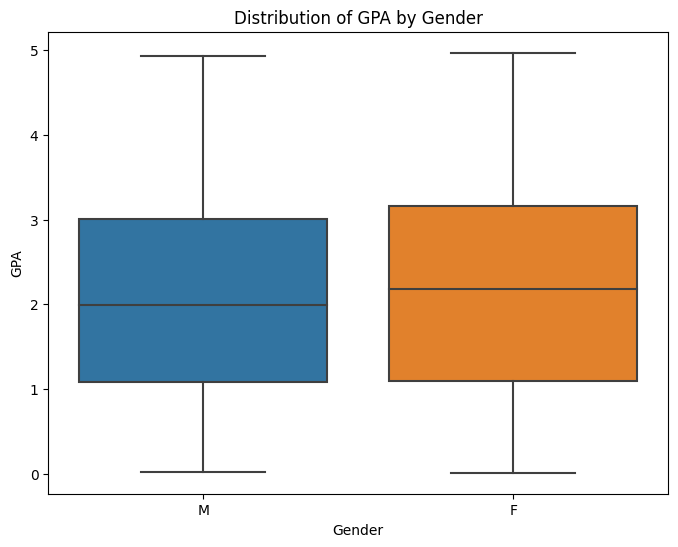

In [282]:
# Create a box plot of Gender by Gpa
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Gender', y='Gpa')
plt.xlabel('Gender')
plt.ylabel('GPA')
plt.title('Distribution of GPA by Gender')
plt.show()

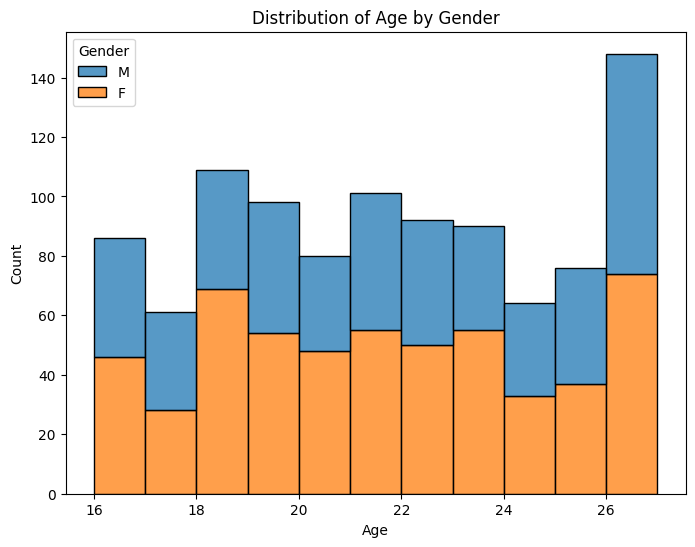

In [283]:
# Plot a histogram of Gender by age
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Age', hue='Gender', multiple='stack')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age by Gender')
plt.show()

<AxesSubplot: >

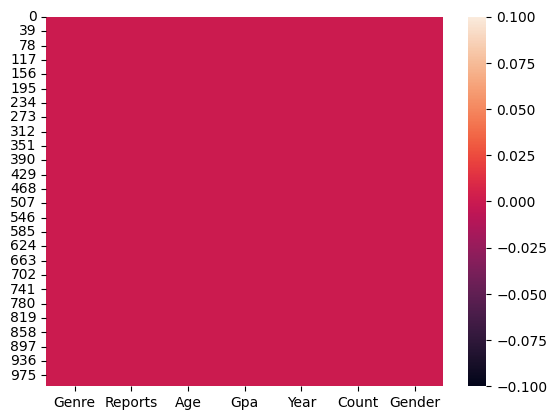

In [284]:
sns.heatmap(df.isnull(), )

In [285]:
df.isnull()

,Genre,Reports,Age,Gpa,Year,Count,Gender
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1000,False,False,False,False,False,False,False
1001,False,False,False,False,False,False,False
1002,False,False,False,False,False,False,False
1003,False,False,False,False,False,False,False


In [286]:
df.nunique()

Genre        11
Reports    1001
Age          12
Gpa         387
Year          5
Count         1
Gender        2
dtype: int64

# EDA

In [287]:
df.drop(['Reports','Count'],inplace=True,axis='columns')

In [288]:
df.columns.tolist()

['Genre', 'Age', 'Gpa', 'Year', 'Gender']

In [ ]:
# The pair plot is useful for getting an overview of the relationships and patterns in the data

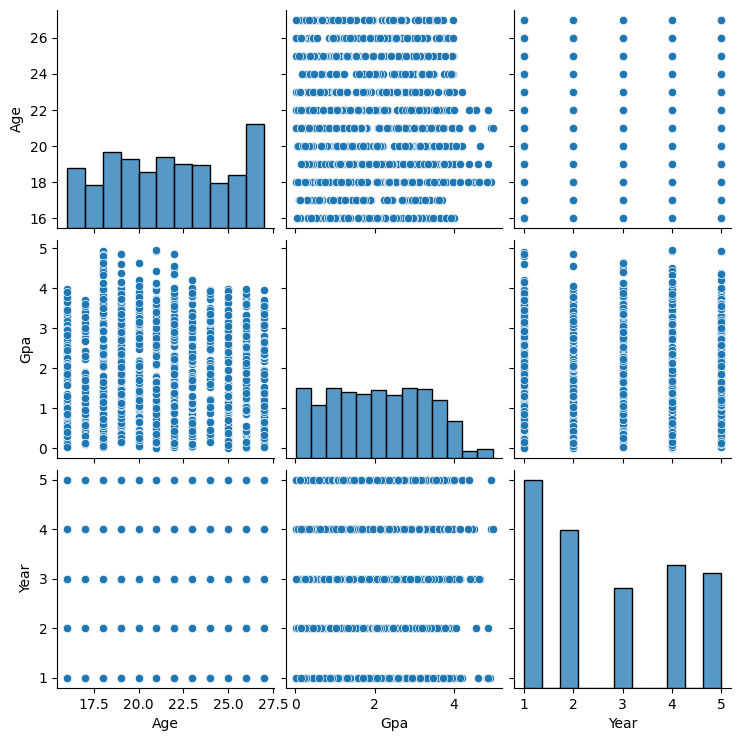

In [289]:
sns.pairplot(df)

/tmp/ipykernel_9603/1181972861.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),)


<AxesSubplot: >

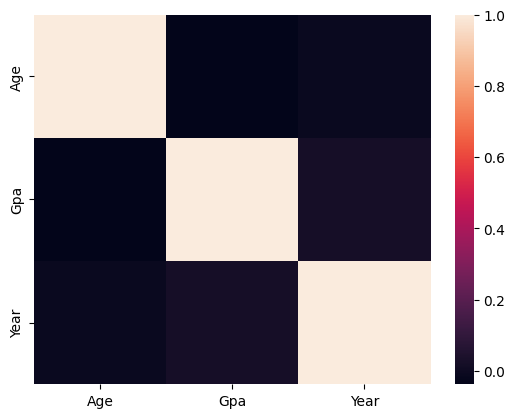

**Statistical Analysis**

In [292]:

correlation_matrix = df.corr()
correlation_matrix

/tmp/ipykernel_9603/4013392793.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


,Age,Gpa,Year
Age,1.000000,-0.037937,-0.012322
Gpa,-0.037937,1.000000,0.020474
Year,-0.012322,0.020474,1.000000


<AxesSubplot: >

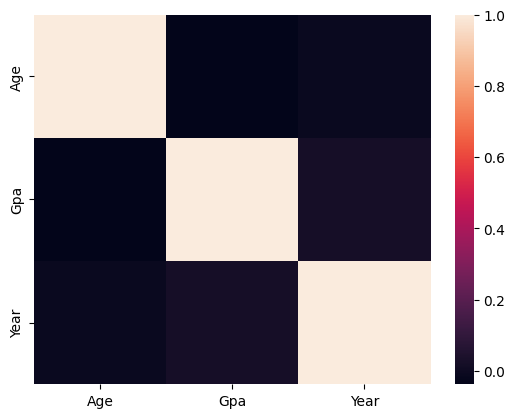

In [293]:
sns.heatmap(correlation_matrix,)

**Make a new column for age calculation**

In [295]:
def convert_age_to_name(x):
    if x < 20:
        return "Fresher"
    elif x < 24:
        return "Sophomore"
    else:
        return "Senior"

In [312]:
df["age_class"]=df['Age'].apply(convert_age_to_name)
df

,Genre,Age,Gpa,Year,Gender,age_cat,age_class
0,Academic Support and Resources,27,2.18,2,M,Senior,Senior
1,Academic Support and Resources,23,3.11,2,F,Sophomore,Sophomore
2,Academic Support and Resources,20,3.68,2,F,Sophomore,Sophomore
3,Academic Support and Resources,20,1.30,2,F,Sophomore,Sophomore
4,Academic Support and Resources,26,2.50,2,F,Senior,Senior
...,...,...,...,...,...,...,...
1000,Food and Cantines,18,1.16,4,M,Fresher,Fresher
1001,Food and Cantines,20,4.05,2,M,Sophomore,Sophomore
1002,Food and Cantines,22,1.86,3,M,Sophomore,Sophomore
1003,Food and Cantines,20,2.06,2,M,Sophomore,Sophomore


In [313]:
df.columns

Index(['Genre', 'Age', 'Gpa', 'Year', 'Gender', 'age_cat', 'age_class'], dtype='object')

In [314]:
pd.DataFrame(df['Genre'].unique(),).rename(columns={0:"Genre Name"})

,Genre Name
0,Academic Support and Resources
1,Athletics and sports
2,Career opportunities
3,Financial Support
4,Health and Well-being Support
5,International student experiences
6,Online learning
7,Student Affairs
8,Housing and Transportation
9,Activities and Travelling


In [315]:
pd.DataFrame(df[["Genre"]].value_counts()).rename(columns={0:'Count'})

,Count
Genre,
Academic Support and Resources,236
Food and Cantines,138
Financial Support,91
Online learning,90
Career opportunities,89
International student experiences,86
Athletics and sports,85
Housing and Transportation,64
Health and Well-being Support,53


Text(0, 0.5, 'Frequency')

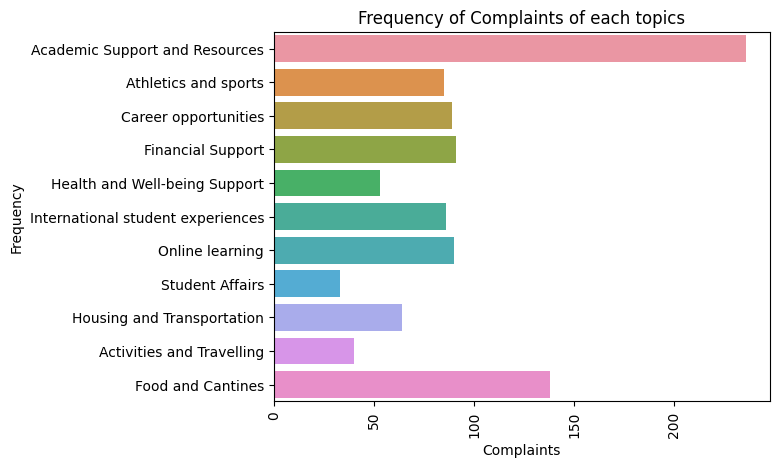

In [316]:
sn.countplot(y=df.Genre,)
plt.xticks(rotation=90)
plt.title('Frequency of Complaints of each topics')
plt.xlabel('Complaints')
plt.ylabel('Frequency')

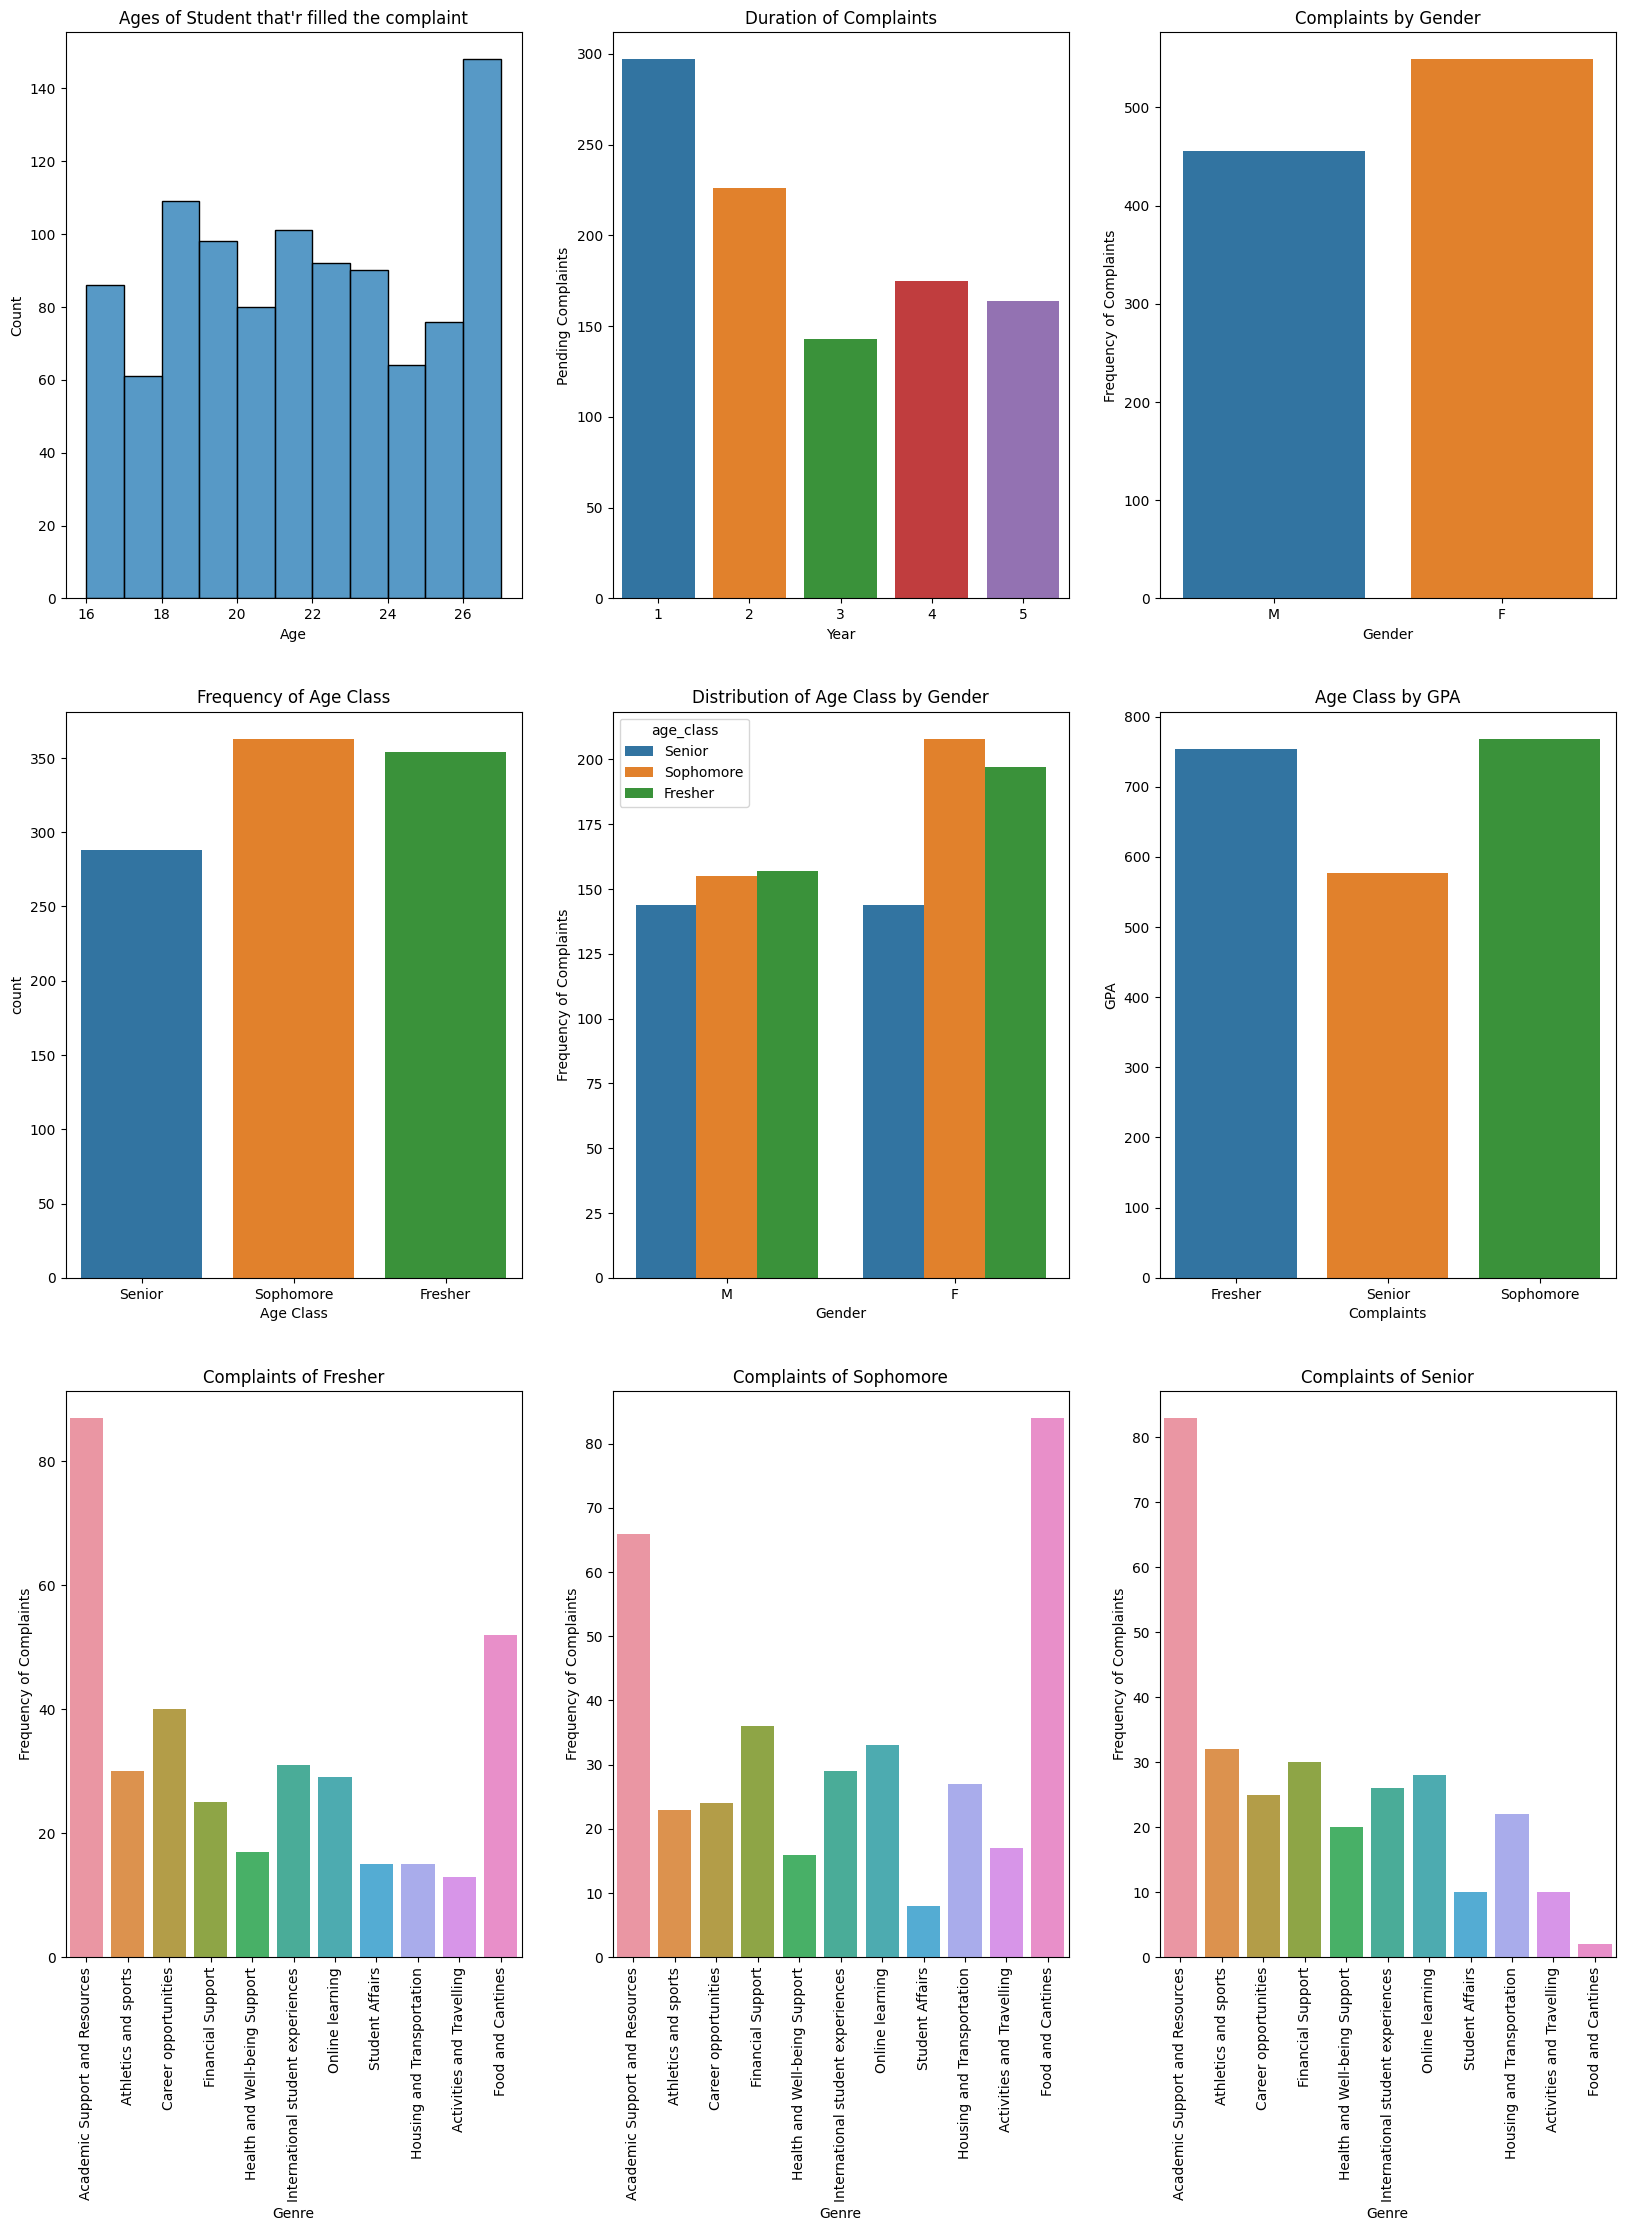

In [317]:
plt.figure(figsize=(20,25))

plt.subplot(331)
sn.histplot(x=df.Age)
plt.title("Ages of Student that'r filled the complaint")

plt.subplot(332)
sn.countplot(x=df.Year)
plt.title('Duration of Complaints')
plt.ylabel('Pending Complaints')

plt.subplot(333)
sn.countplot(x=df.Gender)
plt.ylabel('Frequency of Complaints')
plt.title('Complaints by Gender')

plt.subplot(334)
sn.countplot(x=df.age_class)
plt.title('Frequency of Age Class')
plt.xlabel("Age Class")

plt.subplot(335)
sn.countplot(x=df.Gender,hue=df.age_class)
plt.title("Distribution of Age Class by Gender")
plt.ylabel('Frequency of Complaints')

plt.subplot(336)
y=df[['age_class','Gpa']].groupby('age_class').sum()
sn.barplot(x=y.index,y=y.Gpa)
plt.title('Age Class by GPA')
plt.xlabel('Complaints')
plt.ylabel('GPA')


plt.subplot(337)
sn.countplot(x=df[df.age_class=="Fresher"]["Genre"])
plt.title('Complaints of Fresher')
plt.ylabel('Frequency of Complaints')
plt.xticks(rotation=90)

plt.subplot(338)
sn.countplot(x=df[df.age_class=="Sophomore"]["Genre"])
plt.title('Complaints of Sophomore')
plt.ylabel('Frequency of Complaints')
plt.xticks(rotation=90)

plt.subplot(339)
sn.countplot(x=df[df.age_class=="Senior"]["Genre"])
plt.title('Complaints of Senior')
plt.ylabel('Frequency of Complaints')
plt.xticks(rotation=90)



plt.show()

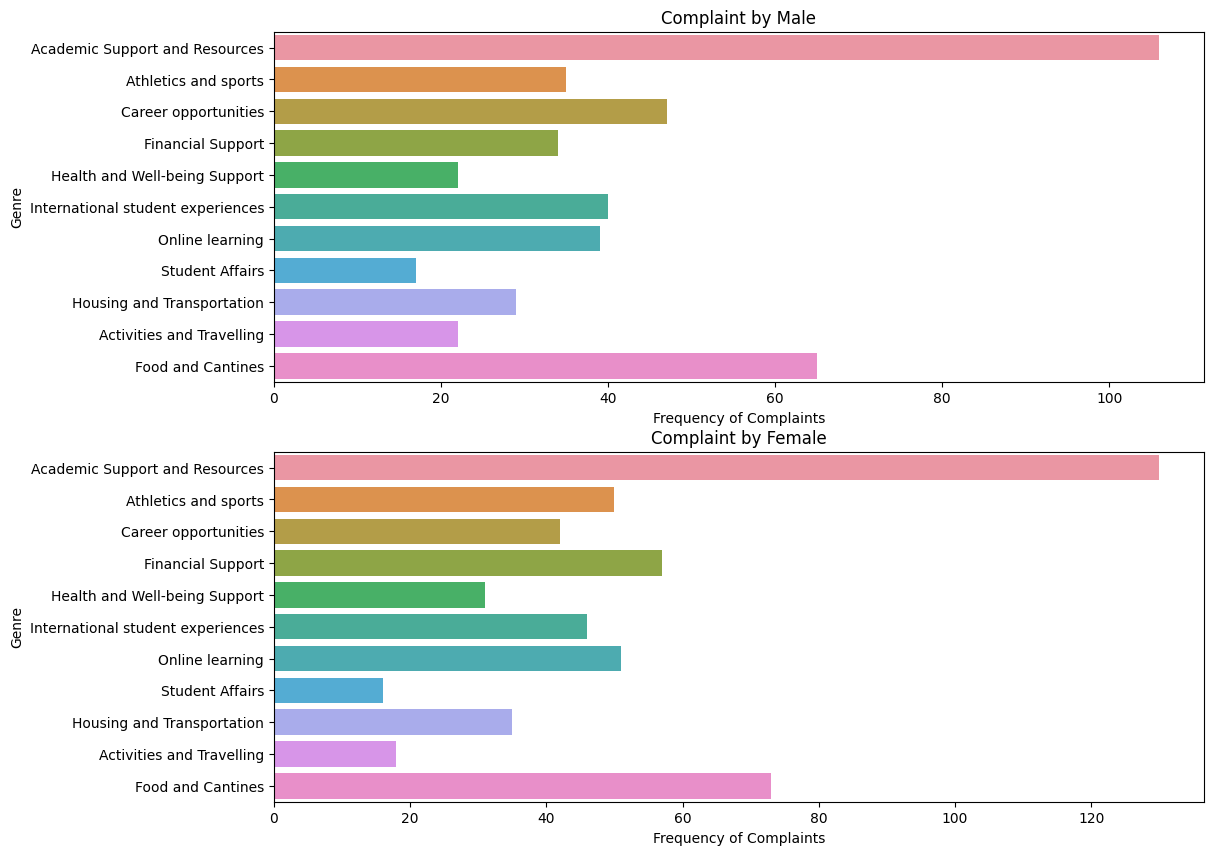

In [318]:
plt.figure(figsize=(12,10))
plt.subplot(211)
sn.countplot(y=df[df.Gender=="M"]["Genre"])
plt.title('Complaint by Male')
plt.xlabel('Frequency of Complaints')


plt.subplot(212)
sn.countplot(y=df[df.Gender=="F"]["Genre"])
plt.title('Complaint by Female')
plt.xlabel('Frequency of Complaints')


plt.show()

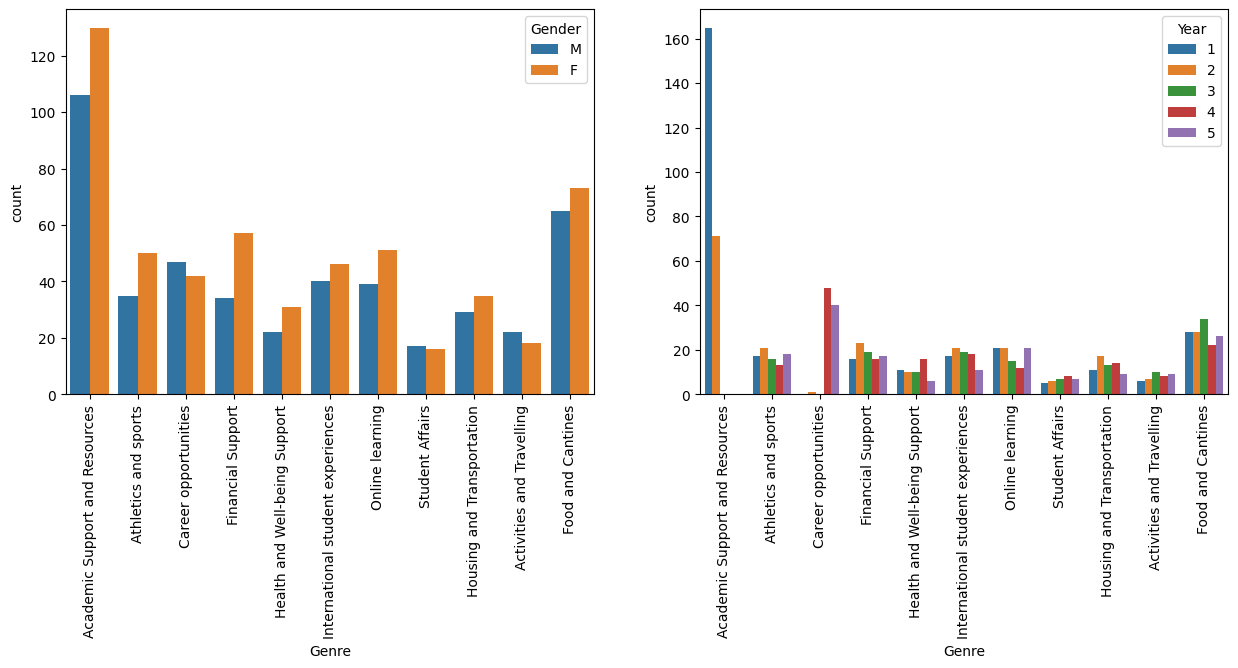

In [319]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.xticks(rotation=90)
sn.countplot(data=df, x = df['Genre'], hue=df['Gender'])

plt.subplot(122)
plt.xticks(rotation=90)
sn.countplot(data=df, x = df['Genre'], hue=df['Year'])


plt.show()

In [320]:
y=df.groupby(['Year','Gender'],as_index=False)['Age'].count()
y['Count']=y.Age
y[['Year','Gender','Count']]

,Year,Gender,Count
0,1,F,155
1,1,M,142
2,2,F,125
3,2,M,101
4,3,F,78
5,3,M,65
6,4,F,93
7,4,M,82
8,5,F,98
9,5,M,66


In [321]:
y=df.groupby(['Year','Genre'],as_index=False)['Age'].count()
y['Count']=y.Age

# Recommdation System

In [328]:
df['Genre'].unique()

array(['Academic Support and Resources', 'Athletics and sports',
       'Career opportunities', 'Financial Support',
       'Health and Well-being Support',
       'International student experiences', 'Online learning',
       'Student Affairs', 'Housing and Transportation',
       'Activities and Travelling', 'Food and Cantines'], dtype=object)

In [329]:
academic_support_resources = ['research', 'course', 'resources', 'education', 'textbook']
athletics_sports = ['athletics', 'sports', 'facilities', 'athlete', 'gender_inequality']
career_opportunities = ['job', 'career', 'opportunities', 'internship', 'scholarship', 'loan']
financial_support = ['financial', 'affordability', 'cost']
health_wellbeing_support = ['mental_health', 'medical', 'care']
international_student_experiences = ['language', 'international']
online_learning = ['online', 'time', 'virtual']
student_affairs = ['affairs', 'certification']
housing_transportation = ['parking', 'transportation', 'housing', 'rent']
activities_traveling = ['places', 'exploration', 'participation', 'events', 'festivals', 'trips', 'travel', 'activities']
food_canteens = ['food', 'canteens', 'cafeteria', 'vegetarian', 'snacks']

In [330]:
def recommended(word):
    categories = {
        'academic_support_resources': academic_support_resources,
        'career_opportunities': career_opportunities,
        'financial_support': financial_support,
        'health_wellbeing_support': health_wellbeing_support,
        'international_student_experiences': international_student_experiences,
        'online_learning': online_learning,
        'student_affairs': student_affairs,
        'housing_transportation': housing_transportation,
        'food_canteens': food_canteens,
        'activities_traveling': activities_traveling,
        'athletics_sports': athletics_sports
    }

    genre_found = False

    for category, keywords in categories.items():
        if any(keyword in word for keyword in keywords):
            print(category.replace('_', ' '))
            genre_found = True

    if not genre_found:
        print('If Genre is not Correct then mention here')

In [331]:
recommended('The limited access to research databases')

academic support resources
